<a href="https://colab.research.google.com/github/Rashmi-Deoli/Stop-Sign-Detection/blob/main/Stop_Sign_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
#Auticate access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Images


*  Collection of pixels
*  Each pixel value indicates the intensity of the pixel.
* Range of pixel values: 0-255
* 0 - Black
* 255 - White



![alt text](https://cdn-images-1.medium.com/max/750/1*15yDvGKV47a0nkf5qLKOOQ.png)



1.   Dowload a ".jpg" format image from Google Search and rename it as "image.jpg"
2.   Go to your Google Drive Folder: self-driving-car
3.   Upload the image to the folder and refresh the browser
4.   Run the following cells





In [ ]:
import imageio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [ ]:
img = imageio.imread("/content/drive/My Drive/stop-sign-detection/image.jpg")

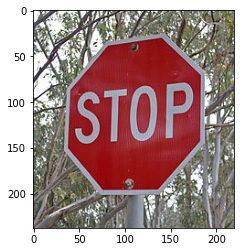

In [ ]:
plt.imshow(img); #plot your image

In [ ]:
img.shape #dimensions of the image

(238, 220, 3)

In [ ]:
img

Array([[[127, 126, 132],
        [255, 254, 255],
        [248, 248, 250],
        ...,
        [ 99,  98,  68],
        [ 87,  83,  56],
        [133, 128,  99]],

       [[252, 251, 255],
        [255, 254, 255],
        [253, 253, 255],
        ...,
        [143, 142, 114],
        [116, 112,  85],
        [130, 124,  98]],

       [[255, 254, 255],
        [242, 242, 244],
        [255, 255, 255],
        ...,
        [159, 159, 131],
        [120, 118,  93],
        [143, 139, 114]],

       ...,

       [[122, 111, 115],
        [122, 111, 115],
        [ 94,  83,  87],
        ...,
        [136, 131, 127],
        [116, 111, 108],
        [106, 102,  99]],

       [[109,  99,  98],
        [ 93,  83,  82],
        [118, 108, 109],
        ...,
        [131, 126, 122],
        [113, 110, 105],
        [107, 107,  99]],

       [[ 96,  87,  82],
        [ 76,  67,  62],
        [136, 128, 126],
        ...,
        [131, 126, 120],
        [117, 114, 107],
        [117, 119, 108]]

In [ ]:
gray_img = rgb2gray(img) #convert color image to grayscale

In [ ]:
gray_img.shape

(238, 220)

In [ ]:
gray_img

array([[0.49664745, 0.99719451, 0.97311451, ..., 0.37666471, 0.32118941,
        0.49792784],
       [0.98627804, 0.99719451, 0.99272235, ..., 0.54977922, 0.4349149 ,
        0.48392314],
       [0.99719451, 0.9495851 , 1.        , ..., 0.61561255, 0.45734314,
        0.54136275],
       ...,
       [0.44559176, 0.44559176, 0.33578784, ..., 0.51676118, 0.43861255,
        0.4024851 ],
       [0.39628588, 0.33354078, 0.43214549, ..., 0.49715333, 0.43245882,
        0.41734588],
       [0.34726275, 0.26883137, 0.50806196, ..., 0.49658784, 0.44757961,
        0.4618898 ]])

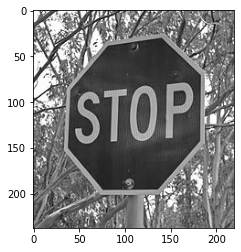

In [ ]:
plt.imshow(gray_img, cmap=plt.cm.gray);

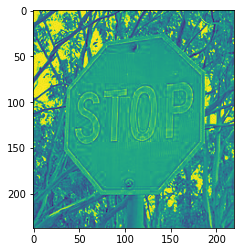

In [ ]:
plt.imshow(img[:,:,0]); #Red Channel of image. Change 0 to 1 for green channel and 2 for blue

## Convolutional Neural Network

![alt text](https://cdn-images-1.medium.com/max/1500/1*vkQ0hXDaQv57sALXAJquxA.jpeg)



1.   Convolution layer: Here, the kernel/filter - taverses throughout the image to find matches. The math performed here is called a convolution
![alt text](https://cdn-images-1.medium.com/max/750/1*GcI7G-JLAQiEoCON7xFbhg.gif)

2.   Pooling Layer: Pooling is a way to take large images and shrink them down while preserving the most important information in them.



![alt text](https://cdn-images-1.medium.com/max/750/1*KQIEqhxzICU7thjaQBfPBQ.png)

3.   Rectified Linear Unit or ReLU: Converts negative numbers to zero.

4. SoftMax: Used as an activation function to determine the class of an image.



# Stop Sign Classification Model

### Library Import

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
!pip install imageio
import imageio

### **Reading Images**

In [ ]:
base_dir = '/content/drive/My Drive/stop-sign-detection/Stop Sign Images'

train_dir = os.path.join(base_dir, 'train')
validation_dir =os.path.join(base_dir, 'validation')

In [ ]:
train_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/train'

In [ ]:
validation_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/validation'

In [ ]:
train_stop_dir =os.path.join(train_dir, 'stop')
train_random_dir =os.path.join(train_dir, 'random')
validation_stop_dir =os.path.join(validation_dir, 'stop')
validation_random_dir = os.path.join(validation_dir, 'random')

In [ ]:
train_stop_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/train/stop'

In [ ]:
train_random_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/train/random'

In [ ]:
validation_random_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/validation/random'

In [ ]:
validation_stop_dir

'/content/drive/My Drive/stop-sign-detection/Stop Sign Images/validation/stop'

In [ ]:
num_stop_tr = len(os.listdir(train_stop_dir))
num_random_tr = len(os.listdir(train_random_dir))

num_stop_val = len(os.listdir(validation_stop_dir))
num_random_val = len(os.listdir(validation_random_dir))

total_train = num_stop_tr + num_random_tr
total_val = num_stop_val + num_random_val

In [ ]:
print('total training stop images:', num_stop_tr)
print('total training random images:', num_random_tr)

print('total validation stop images:', num_stop_val)
print('total validation random images:', num_random_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training stop images: 39
total training random images: 27
total validation stop images: 12
total validation random images: 9
--
Total training images: 66
Total validation images: 21


### Train, Test and Validation Set Generation

Train Generator - (Pre-Processing)

In [ ]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    zoom_range=0.5
                    )

Validation Generator - (Pre-processing)

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen =train_image_generator.flow_from_directory(
                                                batch_size=10,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                color_mode="rgb"
                                                )

Found 66 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=10,
                                                              color_mode="rgb",
                                                              directory=validation_dir,
                                                              target_size=(150,150), #(150,150)
                                                              class_mode='binary')

Found 21 images belonging to 2 classes.


In [ ]:
#Function to view the class labels
def classLabel(source=None):
        datagen = ImageDataGenerator(rescale=1. / 255)
        data_generator = datagen.flow_from_directory(
        source)
        class_dictionary = data_generator.class_indices
        return data_generator, class_dictionary

In [ ]:
labels = classLabel(train_dir)
print(labels)

Found 66 images belonging to 2 classes.
(<tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7fd5dffa6e48>, {'random': 0, 'stop': 1})


Plotting Train Images

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

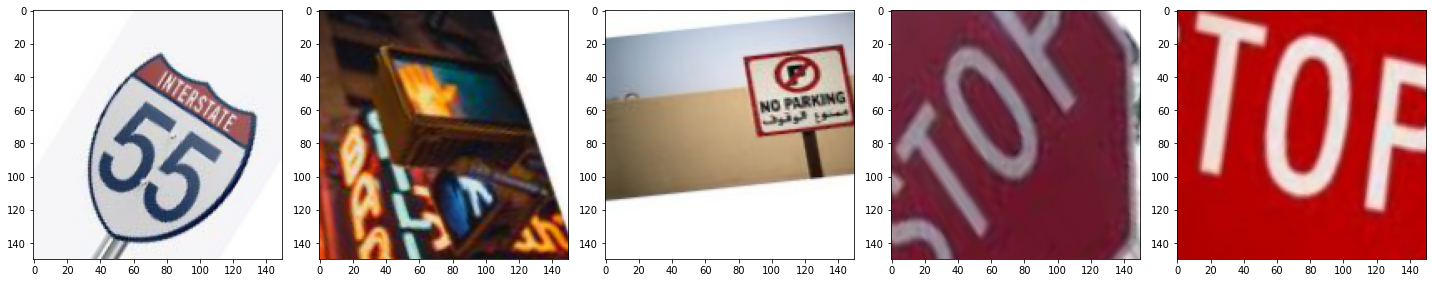

In [ ]:
plotImages(sample_training_images[:5])

### CNN Model Generation

In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3,)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
epochs = 10

In [ ]:
batch_size = 10

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/10
7/7 [==============================] - 2s 305ms/step - loss: 2.1694 - accuracy: 0.5909 - val_loss: 0.6843 - val_accuracy: 0.5714
Epoch 2/10
7/7 [==============================] - 2s 272ms/step - loss: 0.6749 - accuracy: 0.6818 - val_loss: 0.6917 - val_accuracy: 0.4762
Epoch 3/10
7/7 [==============================] - 2s 274ms/step - loss: 0.6783 - accuracy: 0.5000 - val_loss: 0.6707 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 2s 272ms/step - loss: 0.6095 - accuracy: 0.6667 - val_loss: 0.5628 - val_accuracy: 0.6190
Epoch 5/10
7/7 [==============================] - 2s 276ms/step - loss: 0.5339 - accuracy: 0.7121 - val_loss: 0.4776 - val_accuracy: 0.8571
Epoch 6/10
7/7 [==============================] - 2s 275ms/step - loss: 0.4708 - accuracy: 0.7727 - val_loss: 0.4122 - val_accuracy: 0.9048
Epoch 7/10
7/7 [==============================] - 2s 274ms/step - loss: 0.4236 - accuracy: 0.7576 - val_loss: 0.4369 - val_accuracy: 0.8095
Epoch 8/10
7/7 [====

### Testing random google images

In [ ]:
test_generator = validation_image_generator.flow_from_directory(
    directory= '/content/drive/My Drive/stop-sign-detection/Stop Sign Images/test',
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        batch_size=1
)

Found 3 images belonging to 1 classes.


In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)

In [ ]:
predict = model.predict_generator(test_generator,steps = nb_samples)

In [ ]:

predict

array([[0.1928469 , 0.8071531 ],
       [0.06220366, 0.93779635],
       [0.9926282 , 0.00737174]], dtype=float32)

In [ ]:
filenames

['all/0797099E-0EF5-458D-B2A4-AF8351E8B6ED-lg.jpg',
 'all/STOP_sign.jpg',
 'all/test.jpg']